In [1]:
import torch
from utils.PetsDataset import PetsDataset
from torch.utils.data import DataLoader
from UNet import UNet
import matplotlib.pyplot as plt

In [2]:
MODEL_PATH = "../models/U-Net_1711696002.pt"

In [5]:
model = torch.nn.DataParallel(UNet())
model.load_state_dict(torch.load(MODEL_PATH, map_location=torch.device('cpu')))

<All keys matched successfully>

In [6]:
data = PetsDataset()
loader = DataLoader(data, batch_size=1)

In [23]:
image_iterator = iter(loader)
for index in range(5):
    next(image_iterator)

image_size, image, mask = next(image_iterator)

In [24]:
image_to_show = image.squeeze().permute(1, 2, 0)
image_to_show.shape

torch.Size([256, 256, 3])

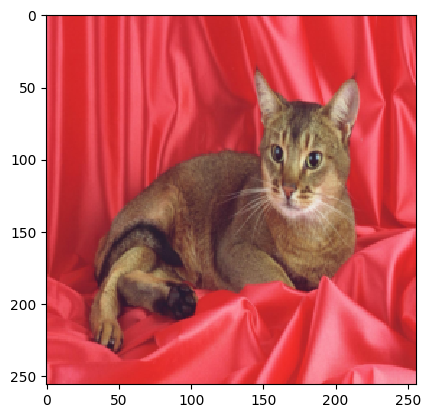

In [25]:
plt.imshow(image_to_show, interpolation="nearest")
plt.show()

In [26]:
mask_to_show = mask.squeeze().permute(1, 2, 0)
mask_to_show.shape

torch.Size([256, 256, 3])

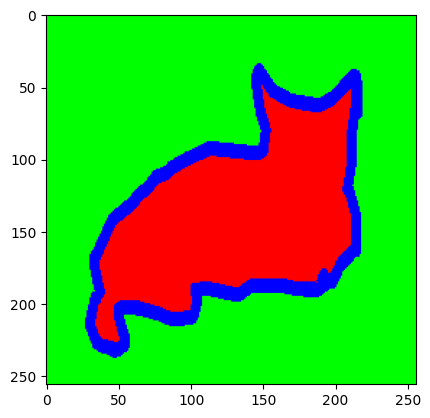

In [27]:
plt.imshow(mask_to_show)
plt.show()

In [28]:
with torch.inference_mode():
    image_to_predict = torch.Tensor.type(image, dtype=torch.float32)
    mask_prediction = model(image_to_predict)

mask_prediction = mask_prediction.squeeze().permute(1, 2, 0)
mask_prediction.shape

torch.Size([256, 256, 3])

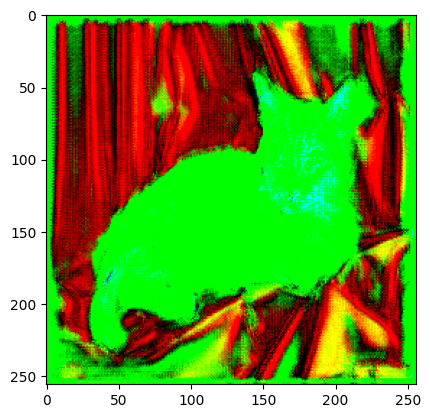

In [29]:
mask_prediction = mask_prediction.clamp(0, 1)
plt.imshow(mask_prediction)
plt.show()